In [248]:
pip install luigi

Note: you may need to restart the kernel to use updated packages.


In [249]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [250]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import urllib
import json
import luigi
import psycopg2

import pymongo
from pymongo import MongoClient, InsertOne

#Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [252]:
import pymongo
import requests

# Connect to the MongoDB server
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Select the database and collection you want to insert the data into
db = client["mydatabase"]
collection = db["mathenDatacollection"]

# Make a GET request to the API to get the JSON data
response = requests.get('https://data.ny.gov/resource/e8ky-4vqe.json')
print(response)

# Extract the JSON data from the response
json_data = response.json()

# Insert the JSON data into the collection
collection.insert_many(json_data)

<Response [200]>


In [253]:
import pymongo
import pandas as pd

# Connect to the MongoDB server
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Select the database and collection you want to retrieve data from
db = client["mydatabase"]
collection = db["mathenDatacollection"]

# Retrieve the data from the collection and convert it to a list of dictionaries
data_list = list(collection.find())

# Load the data into a pandas DataFrame
df = pd.DataFrame(data_list)

# Print the first few rows of the DataFrame
print(df.head())

                        _id  year                accident_descriptor   time  \
0  644ba9a18c82e785823214c8  2017  Property Damage & Injury Accident   6:49   
1  644ba9a18c82e785823214c9  2017                    Injury Accident  17:17   
2  644ba9a18c82e785823214ca  2017           Property Damage Accident  22:50   
3  644ba9a18c82e785823214cb  2017           Property Damage Accident  10:00   
4  644ba9a18c82e785823214cc  2017           Property Damage Accident   7:05   

                      date day_of_week police_report lighting_conditions  \
0  2017-01-03T00:00:00.000     Tuesday             Y                Dawn   
1  2017-01-02T00:00:00.000      Monday             Y   Dark-Road Lighted   
2  2017-01-02T00:00:00.000      Monday             Y   Dark-Road Lighted   
3  2017-01-03T00:00:00.000     Tuesday             Y            Daylight   
4  2017-01-03T00:00:00.000     Tuesday             Y            Daylight   

  municipality collision_type_descriptor county_name     road_descri

In [254]:
# create a class to run luigi task and run the pipeline 
class LoadFromMongodb(luigi.Task):
    """
    A Luigi task to write a json file into mongodb
    """
    client = luigi.Parameter()
    database = luigi.Parameter()
    collection = luigi.Parameter()
    path = luigi.Parameter()

    def output(self):
        """
        Returns the target output for this task. 

        """
        return luigi.LocalTarget(self.path)

    def run(self):
        """
        Contains the logic of the Task, 
        """
        # setting mongodb client
        client = pymongo.MongoClient(self.client)
        db = client[self.database]
        collection = db[self.collection]
        
        # load data from mongo db and save into dataframe
        loaded_data = collection.find()
        df = pd.DataFrame(loaded_data)
        df.drop(['_id'], axis = 1, inplace = True)
        with self.output().open("w") as f:
            f.write(df.to_csv(index = False))

In [255]:
import argparse

In [256]:
class MainTask(luigi.Task):
    """
    The main Luigi task that depends on the LoadFromMongodb task and runs it
    """
    client = luigi.Parameter()
    database = luigi.Parameter()
    collection = luigi.Parameter()
    path = luigi.Parameter()

    def requires(self):
        """
        Specifies the task or tasks that this task depends on.
        """
        return LoadFromMongodb(self.client, self.database, self.collection, self.path)

if __name__ == '__main__':
    # define command line arguments
    parser = argparse.ArgumentParser(description='Run Luigi pipeline')
    parser.add_argument('--client', required=True, help='MongoDB client url')
    parser.add_argument('--database', required=True, help='MongoDB database name')
    parser.add_argument('--collection', required=True, help='MongoDB collection name')
    parser.add_argument('--path', required=True, help='Path to output JSON file')

    # parse command line arguments
    args = parser.parse_args()

    # run the pipeline
    luigi.build([MainTask(client=args.client, database=args.database, collection=args.collection, path=args.path)], local_scheduler=True)


usage: ipykernel_launcher.py [-h] --client CLIENT --database DATABASE
                             --collection COLLECTION --path PATH
ipykernel_launcher.py: error: the following arguments are required: --client, --database, --collection, --path


SystemExit: 2

In [257]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [258]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [259]:
pip install Jinja2

Note: you may need to restart the kernel to use updated packages.


In [260]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [261]:
import pandas as pd

#processingDataFrame=pd.df
print('Shape of data is :  ',df.shape) #Shape of data.
dforiginal=df
print(dforiginal)

Shape of data is :   (6000, 19)
                           _id  year                accident_descriptor  \
0     644ba9a18c82e785823214c8  2017  Property Damage & Injury Accident   
1     644ba9a18c82e785823214c9  2017                    Injury Accident   
2     644ba9a18c82e785823214ca  2017           Property Damage Accident   
3     644ba9a18c82e785823214cb  2017           Property Damage Accident   
4     644ba9a18c82e785823214cc  2017           Property Damage Accident   
...                        ...   ...                                ...   
5995  644fafe08c82e78582322c3d  2019           Property Damage Accident   
5996  644fafe08c82e78582322c3e  2019           Property Damage Accident   
5997  644fafe08c82e78582322c3f  2019           Property Damage Accident   
5998  644fafe08c82e78582322c40  2019           Property Damage Accident   
5999  644fafe08c82e78582322c41  2019           Property Damage Accident   

       time                     date day_of_week police_report  \
0

In [262]:
print('Total null reocrds in Data :\n',df.isnull().sum())

Total null reocrds in Data :
 _id                                 0
year                                0
accident_descriptor                 0
time                                0
date                                0
day_of_week                         0
police_report                       0
lighting_conditions                 0
municipality                       18
collision_type_descriptor           0
county_name                         0
road_descriptor                     0
weather_conditions                  0
traffic_control_device              0
road_surface_conditions             0
pedestrian_bicyclist_action         0
event_descriptor                    0
number_of_vehicles_involved         0
dot_reference_marker_location    4014
dtype: int64


In [263]:
#missing values in the columns with the % of total values

mis_val=df.isnull().sum()

mis_val_percent=100*mis_val/len(df)

print(mis_val_percent)

Mis_val=pd.concat([mis_val,mis_val_percent],axis=1)

Mis_val=Mis_val.rename(columns={0 : 'Missing Values', 1 : '% of Total Values'})

_id                               0.0
year                              0.0
accident_descriptor               0.0
time                              0.0
date                              0.0
day_of_week                       0.0
police_report                     0.0
lighting_conditions               0.0
municipality                      0.3
collision_type_descriptor         0.0
county_name                       0.0
road_descriptor                   0.0
weather_conditions                0.0
traffic_control_device            0.0
road_surface_conditions           0.0
pedestrian_bicyclist_action       0.0
event_descriptor                  0.0
number_of_vehicles_involved       0.0
dot_reference_marker_location    66.9
dtype: float64


In [231]:
Mis_val_filtered = Mis_val.loc[Mis_val.iloc[:, 1] != 0].sort_values(by='% of Total Values', ascending=False)

styled_Mis_val = Mis_val_filtered.style.background_gradient(cmap='Reds')
styled_Mis_val



,Missing Values,% of Total Values
dot_reference_marker_location,3345,66.900000
municipality,15,0.300000


In [232]:
import pandas as pd

dfnew=df

dfnew = dfnew.drop('dot_reference_marker_location', axis=1)

dfnew.fillna(0, inplace=True)
# Display the modified dataframe
print(dfnew)
# Display the modified DataFrame
print('Modified DataFrame:')
print(dfnew)

                           _id  year                accident_descriptor  \
0     644ba9a18c82e785823214c8  2017  Property Damage & Injury Accident   
1     644ba9a18c82e785823214c9  2017                    Injury Accident   
2     644ba9a18c82e785823214ca  2017           Property Damage Accident   
3     644ba9a18c82e785823214cb  2017           Property Damage Accident   
4     644ba9a18c82e785823214cc  2017           Property Damage Accident   
...                        ...   ...                                ...   
4995  644f9ab68c82e78582322853  2019           Property Damage Accident   
4996  644f9ab68c82e78582322854  2019           Property Damage Accident   
4997  644f9ab68c82e78582322855  2019           Property Damage Accident   
4998  644f9ab68c82e78582322856  2019           Property Damage Accident   
4999  644f9ab68c82e78582322857  2019           Property Damage Accident   

       time                     date day_of_week police_report  \
0      6:49  2017-01-03T00:00:00.

In [233]:

mis_val=dfnew.isnull().sum()

mis_val_percent=100*mis_val/len(dfnew)

print(mis_val_percent)

Mis_val=pd.concat([mis_val,mis_val_percent],axis=1)

Mis_val=Mis_val.rename(columns={0 : 'Missing Values', 1 : '% of Total Values'})

_id                            0.0
year                           0.0
accident_descriptor            0.0
time                           0.0
date                           0.0
day_of_week                    0.0
police_report                  0.0
lighting_conditions            0.0
municipality                   0.0
collision_type_descriptor      0.0
county_name                    0.0
road_descriptor                0.0
weather_conditions             0.0
traffic_control_device         0.0
road_surface_conditions        0.0
pedestrian_bicyclist_action    0.0
event_descriptor               0.0
number_of_vehicles_involved    0.0
dtype: float64


In [234]:
Mis_val_filtered = Mis_val.loc[Mis_val.iloc[:, 1] != 0].sort_values(by='% of Total Values', ascending=False)

styled_Mis_val = Mis_val_filtered.style.background_gradient(cmap='Reds')
styled_Mis_val
dfnew

,_id,year,accident_descriptor,time,date,day_of_week,police_report,lighting_conditions,municipality,collision_type_descriptor,county_name,road_descriptor,weather_conditions,traffic_control_device,road_surface_conditions,pedestrian_bicyclist_action,event_descriptor,number_of_vehicles_involved
0,644ba9a18c82e785823214c8,2017,Property Damage & Injury Accident,6:49,2017-01-03T00:00:00.000,Tuesday,Y,Dawn,HEMPSTEAD,REAR END,NASSAU,Straight and Level,Cloudy,Traffic Signal,Wet,Not Applicable,"Other Motor Vehicle, Collision With",2
1,644ba9a18c82e785823214c9,2017,Injury Accident,17:17,2017-01-02T00:00:00.000,Monday,Y,Dark-Road Lighted,HEMPSTEAD,OTHER,NASSAU,Straight and Level,Rain,Stop Sign,Wet,"Crossing, With Signal","Pedestrian, Collision With",1
2,644ba9a18c82e785823214ca,2017,Property Damage Accident,22:50,2017-01-02T00:00:00.000,Monday,Y,Dark-Road Lighted,HEMPSTEAD,LEFT TURN (3),NASSAU,Straight and Level,Rain,Traffic Signal,Wet,Not Applicable,"Other Motor Vehicle, Collision With",2
3,644ba9a18c82e785823214cb,2017,Property Damage Accident,10:00,2017-01-03T00:00:00.000,Tuesday,Y,Daylight,HEMPSTEAD,OVERTAKING,NASSAU,Straight and Level,Rain,Traffic Signal,Wet,Not Applicable,"Other Motor Vehicle, Collision With",2
4,644ba9a18c82e785823214cc,2017,Property Damage Accident,7:05,2017-01-03T00:00:00.000,Tuesday,Y,Daylight,HEMPSTEAD,REAR END,NASSAU,Straight and Level,Cloudy,None,Wet,Not Applicable,"Other Motor Vehicle, Collision With",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,644f9ab68c82e78582322853,2019,Property Damage Accident,1:37,2019-01-02T00:00:00.000,Wednesday,Y,Dark-Road Unlighted,WHITE PLAINS,OTHER,WESTCHESTER,Straight and Grade,Cloudy,None,Dry,Not Applicable,"Guide Rail - Not At End, Collision With Fixed ...",1
4996,644f9ab68c82e78582322854,2019,Property Damage Accident,20:00,2019-01-01T00:00:00.000,Tuesday,Y,Dark-Road Unlighted,SOUTHPORT,OTHER,CHEMUNG,Straight and Level,Cloudy,None,Dry,Not Applicable,Deer,1
4997,644f9ab68c82e78582322855,2019,Property Damage Accident,14:43,2019-01-01T00:00:00.000,Tuesday,Y,Daylight,ROME,OVERTAKING,ONEIDA,Straight and Level,Cloudy,None,Wet,Not Applicable,"Other Motor Vehicle, Collision With",2
4998,644f9ab68c82e78582322856,2019,Property Damage Accident,9:49,2019-01-02T00:00:00.000,Wednesday,Y,Daylight,NEW ROCHELLE,OVERTAKING,WESTCHESTER,Curve and Level,Clear,Yield Sign,Dry,Not Applicable,"Other Motor Vehicle, Collision With",2


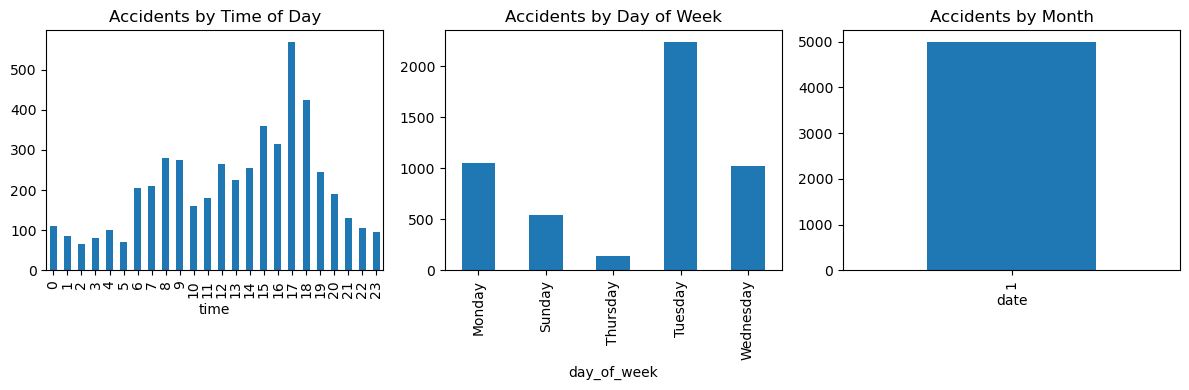

In [235]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' column to datetime format
dfnew['date'] = pd.to_datetime(dfnew['date'])

# Convert 'time' column to datetime format
dfnew['time'] = pd.to_datetime(df['time'], format='%H:%M')



# Time analysis
by_time_of_day = dfnew.groupby(dfnew['time'].dt.hour)['time'].count()
by_day_of_week = dfnew.groupby(dfnew['day_of_week'])['day_of_week'].count()
by_month = dfnew.groupby(dfnew['date'].dt.month)['date'].count()

# Plot time analysis
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
by_time_of_day.plot(ax=axes[0], kind='bar', title='Accidents by Time of Day')
by_day_of_week.plot(ax=axes[1], kind='bar', title='Accidents by Day of Week')
by_month.plot(ax=axes[2], kind='bar', title='Accidents by Month')
plt.tight_layout()

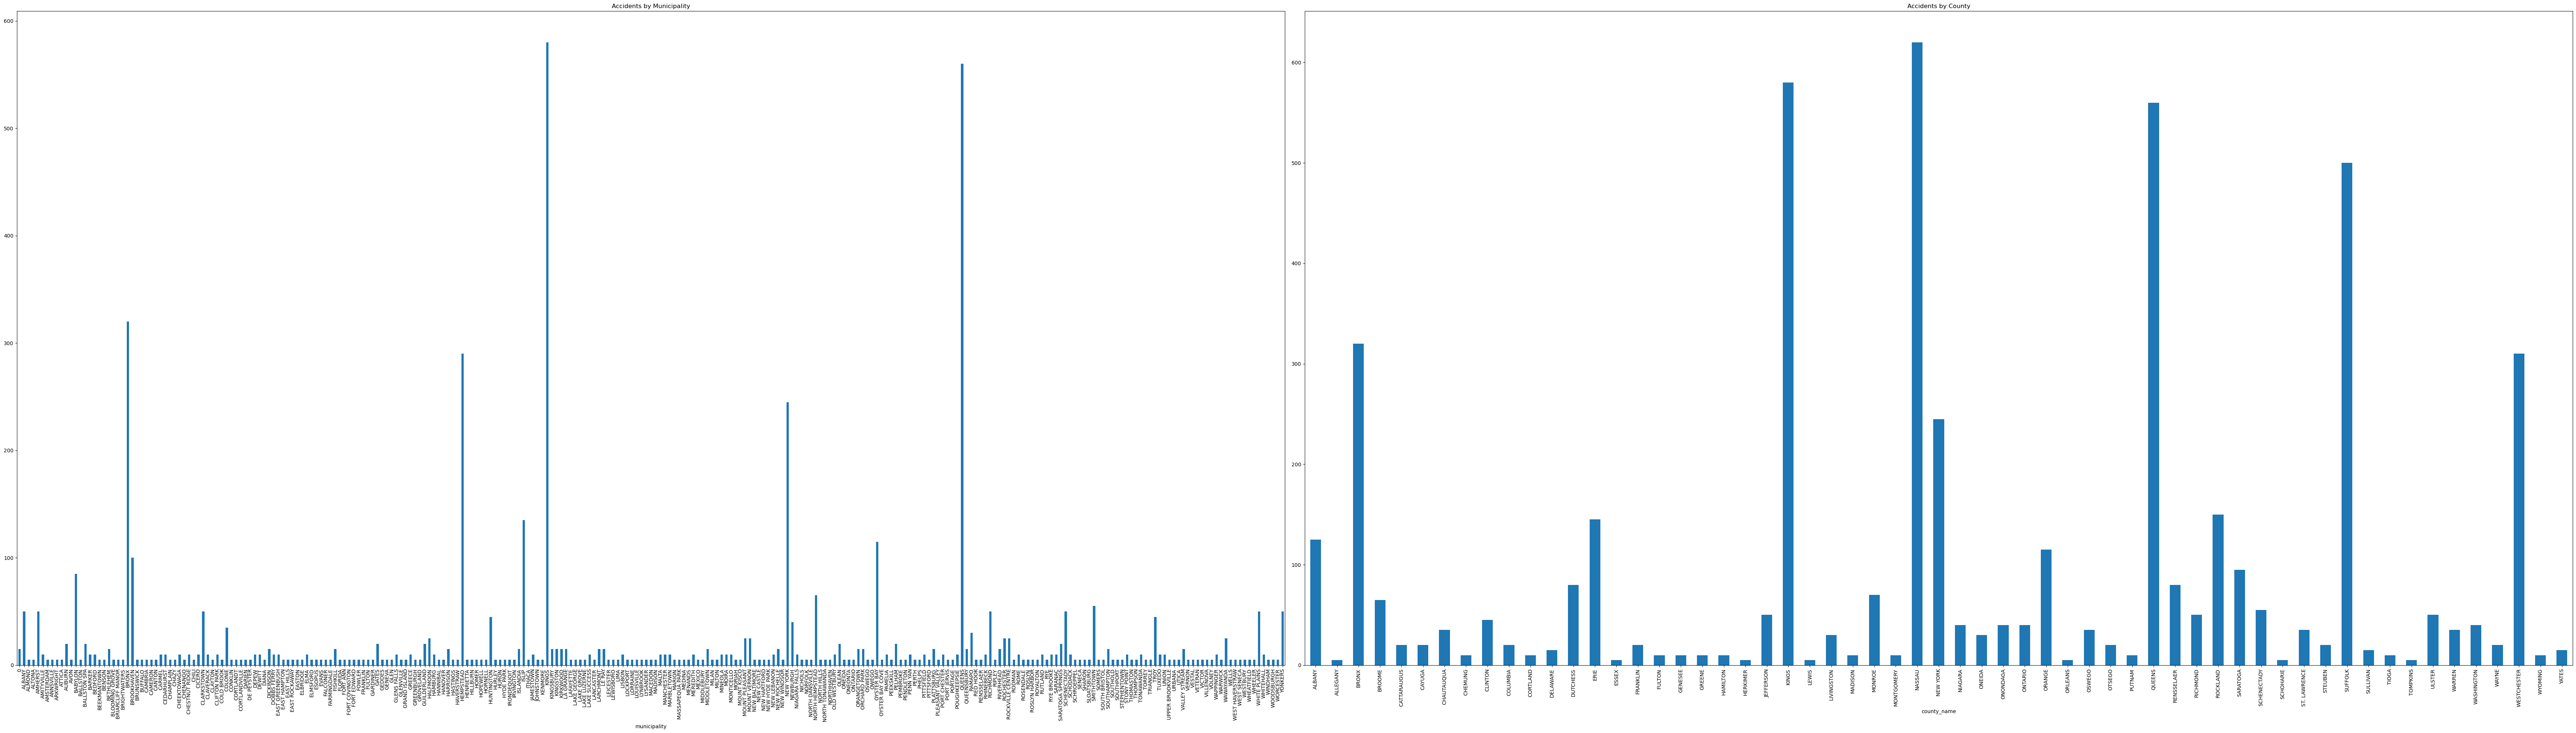

In [277]:

# Location analysis
by_municipality = dfnew.groupby('municipality')['municipality'].count()
by_county = dfnew.groupby('county_name')['county_name'].count()

# Plot location analysis
fig, axes = plt.subplots(1, 2, figsize=(70, 20))
#fig, axes = plt.subplots(1, 2, figsize=(10, 4))
by_municipality.plot(ax=axes[0], kind='bar', title='Accidents by Municipality')
by_county.plot(ax=axes[1], kind='bar', title='Accidents by County')
plt.tight_layout()

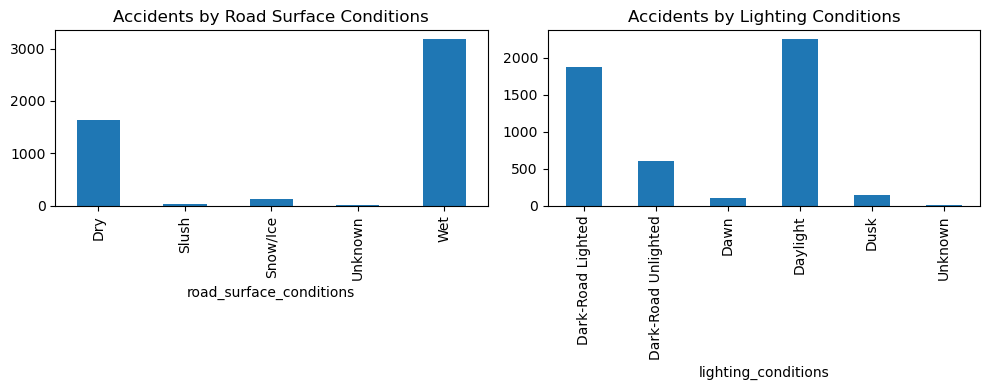

In [237]:

# Road condition analysis
by_road_surface_conditions = df.groupby('road_surface_conditions')['road_surface_conditions'].count()
by_lighting_conditions = df.groupby('lighting_conditions')['lighting_conditions'].count()

# Plot road condition analysis
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
by_road_surface_conditions.plot(ax=axes[0], kind='bar', title='Accidents by Road Surface Conditions')
by_lighting_conditions.plot(ax=axes[1], kind='bar', title='Accidents by Lighting Conditions')
plt.tight_layout()

In [238]:
# Collision type analysis
by_collision_type = df.groupby('collision_type_descriptor')['collision_type_descriptor'].count()

<AxesSubplot:title={'center':'Accidents by Collision Type'}, xlabel='collision_type_descriptor'>

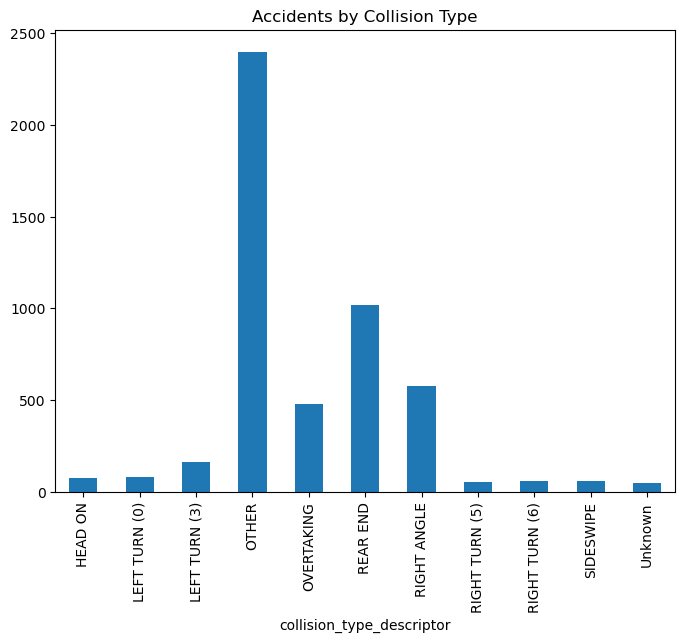

In [239]:
# Plot collision type analysis
fig, ax = plt.subplots(figsize=(8, 6))
by_collision_type.plot(ax=ax, kind='bar', title='Accidents by Collision Type')

In [240]:
# Vehicle involvement analysis
by_num_vehicles_involved = df.groupby('number_of_vehicles_involved')['number_of_vehicles_involved'].count()

<AxesSubplot:title={'center':'Accidents by Number of Vehicles Involved'}, xlabel='number_of_vehicles_involved'>

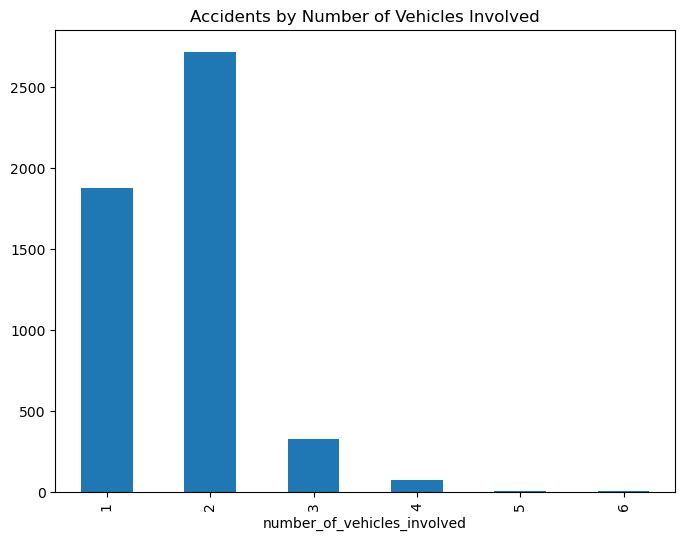

In [241]:


# Plot vehicle involvement analysis
fig, ax = plt.subplots(figsize=(8, 6))
by_num_vehicles_involved.plot(ax=ax, kind='bar', title='Accidents by Number of Vehicles Involved')

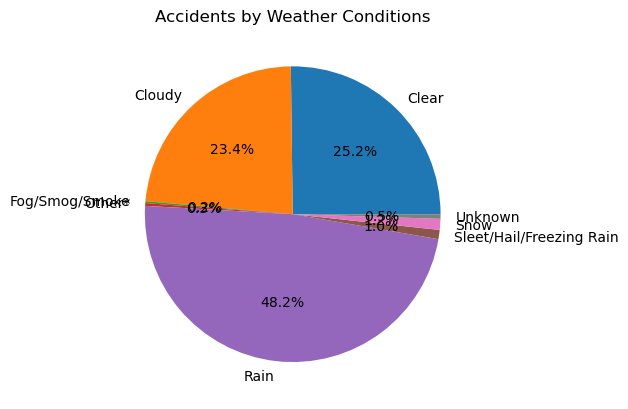

In [242]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'weather_conditions' and count the number of accidents
by_weather = dfnew.groupby('weather_conditions')['weather_conditions'].count()

# Create a pie chart of the accident counts by weather conditions
fig, ax = plt.subplots()
ax.pie(by_weather, labels=by_weather.index, autopct='%1.1f%%')
ax.set_title('Accidents by Weather Conditions')
plt.show()

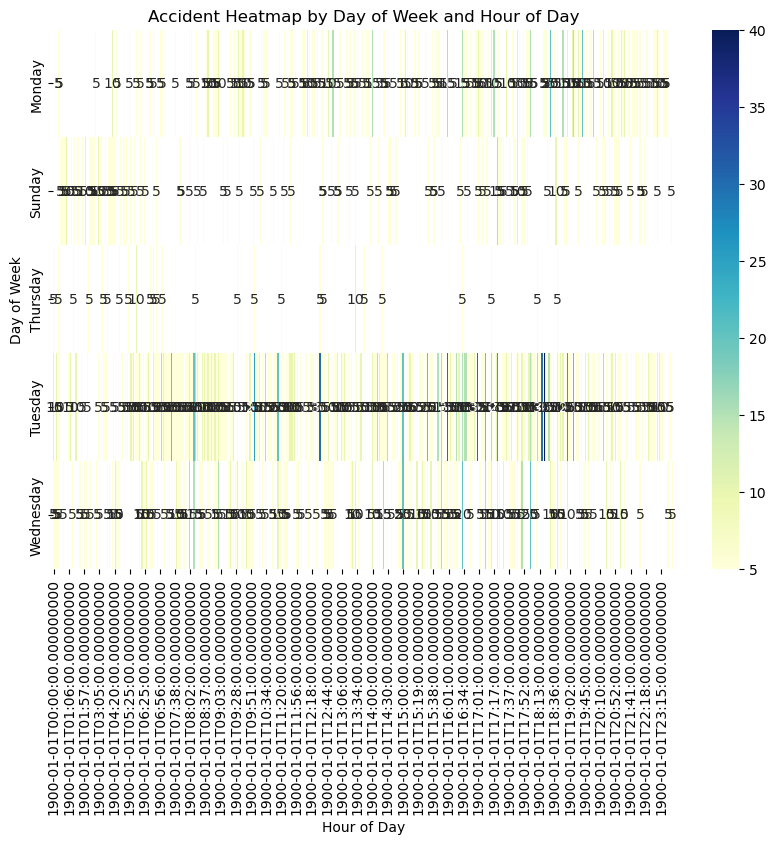

In [264]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the day of the week and hour of the accident from the 'date' and 'time' columns
dfnew['date'] = pd.to_datetime(dfnew['date'])
dfnew['day_of_week'] = dfnew['date'].dt.day_name()

df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour

#dfnew['time'] = pd.to_datetime(dfnew['time'], format='%H:%M:%S').dt.hour

# Create a pivot table of accident counts by day of the week and hour of the day
pivot = pd.pivot_table(dfnew, values='accident_descriptor', index='day_of_week', columns='time', aggfunc='count')

# Create a heatmap of the pivot table using seaborn
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='g')
ax.set_title('Accident Heatmap by Day of Week and Hour of Day')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Day of Week')
plt.show()



In [246]:
import psycopg2
from sqlalchemy import create_engine

# PostgreSQL connection information
db_name = "postgres"
db_user = "data"
db_password = "data"
db_host = "87.44.4.198"
db_port = "5432"

# Create an engine to connect to the database
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Insert the DataFrame to a table called my_table
table_name = "my_table"
dfnew.to_sql(table_name, engine, if_exists='append', index=False)
¸


ProgrammingError: (psycopg2.ProgrammingError) can't adapt type 'ObjectId'
[SQL: INSERT INTO my_table (_id, year, accident_descriptor, time, date, day_of_week, police_report, lighting_conditions, municipality, collision_type_descriptor, county_name, road_descriptor, weather_conditions, traffic_control_device, road_surface_conditions, pedestrian_bicyclist_action, event_descriptor, number_of_vehicles_involved) VALUES (%(_id)s, %(year)s, %(accident_descriptor)s, %(time)s, %(date)s, %(day_of_week)s, %(police_report)s, %(lighting_conditions)s, %(municipality)s, %(collision_type_descriptor)s, %(county_name)s, %(road_descriptor)s, %(weather_conditions)s, %(traffic_control_device)s, %(road_surface_conditions)s, %(pedestrian_bicyclist_action)s, %(event_descriptor)s, %(number_of_vehicles_involved)s)]
[parameters: ({'_id': ObjectId('644ba9a18c82e785823214c8'), 'year': '2017', 'accident_descriptor': 'Property Damage & Injury Accident', 'time': datetime.datetime(1900, 1, 1, 6, 49), 'date': datetime.datetime(2017, 1, 3, 0, 0), 'day_of_week': 'Tuesday', 'police_report': 'Y', 'lighting_conditions': 'Dawn', 'municipality': 'HEMPSTEAD', 'collision_type_descriptor': 'REAR END', 'county_name': 'NASSAU', 'road_descriptor': 'Straight and Level', 'weather_conditions': 'Cloudy', 'traffic_control_device': 'Traffic Signal', 'road_surface_conditions': 'Wet', 'pedestrian_bicyclist_action': 'Not Applicable', 'event_descriptor': 'Other Motor Vehicle, Collision With', 'number_of_vehicles_involved': '2'}, {'_id': ObjectId('644ba9a18c82e785823214c9'), 'year': '2017', 'accident_descriptor': 'Injury Accident', 'time': datetime.datetime(1900, 1, 1, 17, 17), 'date': datetime.datetime(2017, 1, 2, 0, 0), 'day_of_week': 'Monday', 'police_report': 'Y', 'lighting_conditions': 'Dark-Road Lighted', 'municipality': 'HEMPSTEAD', 'collision_type_descriptor': 'OTHER', 'county_name': 'NASSAU', 'road_descriptor': 'Straight and Level', 'weather_conditions': 'Rain', 'traffic_control_device': 'Stop Sign', 'road_surface_conditions': 'Wet', 'pedestrian_bicyclist_action': 'Crossing, With Signal', 'event_descriptor': 'Pedestrian, Collision With', 'number_of_vehicles_involved': '1'}, {'_id': ObjectId('644ba9a18c82e785823214ca'), 'year': '2017', 'accident_descriptor': 'Property Damage Accident', 'time': datetime.datetime(1900, 1, 1, 22, 50), 'date': datetime.datetime(2017, 1, 2, 0, 0), 'day_of_week': 'Monday', 'police_report': 'Y', 'lighting_conditions': 'Dark-Road Lighted', 'municipality': 'HEMPSTEAD', 'collision_type_descriptor': 'LEFT TURN (3)', 'county_name': 'NASSAU', 'road_descriptor': 'Straight and Level', 'weather_conditions': 'Rain', 'traffic_control_device': 'Traffic Signal', 'road_surface_conditions': 'Wet', 'pedestrian_bicyclist_action': 'Not Applicable', 'event_descriptor': 'Other Motor Vehicle, Collision With', 'number_of_vehicles_involved': '2'}, {'_id': ObjectId('644ba9a18c82e785823214cb'), 'year': '2017', 'accident_descriptor': 'Property Damage Accident', 'time': datetime.datetime(1900, 1, 1, 10, 0), 'date': datetime.datetime(2017, 1, 3, 0, 0), 'day_of_week': 'Tuesday', 'police_report': 'Y', 'lighting_conditions': 'Daylight', 'municipality': 'HEMPSTEAD', 'collision_type_descriptor': 'OVERTAKING', 'county_name': 'NASSAU', 'road_descriptor': 'Straight and Level', 'weather_conditions': 'Rain', 'traffic_control_device': 'Traffic Signal', 'road_surface_conditions': 'Wet', 'pedestrian_bicyclist_action': 'Not Applicable', 'event_descriptor': 'Other Motor Vehicle, Collision With', 'number_of_vehicles_involved': '2'}, {'_id': ObjectId('644ba9a18c82e785823214cc'), 'year': '2017', 'accident_descriptor': 'Property Damage Accident', 'time': datetime.datetime(1900, 1, 1, 7, 5), 'date': datetime.datetime(2017, 1, 3, 0, 0), 'day_of_week': 'Tuesday', 'police_report': 'Y', 'lighting_conditions': 'Daylight', 'municipality': 'HEMPSTEAD', 'collision_type_descriptor': 'REAR END', 'county_name': 'NASSAU', 'road_descriptor': 'Straight and Level', 'weather_conditions': 'Cloudy', 'traffic_control_device': 'None', 'road_surface_conditions': 'Wet', 'pedestrian_bicyclist_action': 'Not Applicable', 'event_descriptor': 'Other Motor Vehicle, Collision With', 'number_of_vehicles_involved': '2'}, {'_id': ObjectId('644ba9a18c82e785823214cd'), 'year': '2017', 'accident_descriptor': 'Property Damage Accident', 'time': datetime.datetime(1900, 1, 1, 21, 40), 'date': datetime.datetime(2017, 1, 2, 0, 0), 'day_of_week': 'Monday', 'police_report': 'Y', 'lighting_conditions': 'Dark-Road Lighted', 'municipality': 'OYSTER BAY COVE', 'collision_type_descriptor': 'RIGHT ANGLE', 'county_name': 'NASSAU', 'road_descriptor': 'Straight and Level', 'weather_conditions': 'Rain', 'traffic_control_device': 'Traffic Signal', 'road_surface_conditions': 'Wet', 'pedestrian_bicyclist_action': 'Not Applicable', 'event_descriptor': 'Other Motor Vehicle, Collision With', 'number_of_vehicles_involved': '2'}, {'_id': ObjectId('644ba9a18c82e785823214ce'), 'year': '2017', 'accident_descriptor': 'Property Damage Accident', 'time': datetime.datetime(1900, 1, 1, 6, 50), 'date': datetime.datetime(2017, 1, 3, 0, 0), 'day_of_week': 'Tuesday', 'police_report': 'Y', 'lighting_conditions': 'Daylight', 'municipality': 'HEMPSTEAD', 'collision_type_descriptor': 'REAR END', 'county_name': 'NASSAU', 'road_descriptor': 'Straight and Level', 'weather_conditions': 'Rain', 'traffic_control_device': 'Traffic Signal', 'road_surface_conditions': 'Wet', 'pedestrian_bicyclist_action': 'Not Applicable', 'event_descriptor': 'Other Motor Vehicle, Collision With', 'number_of_vehicles_involved': '2'}, {'_id': ObjectId('644ba9a18c82e785823214cf'), 'year': '2017', 'accident_descriptor': 'Injury Accident', 'time': datetime.datetime(1900, 1, 1, 9, 50), 'date': datetime.datetime(2017, 1, 2, 0, 0), 'day_of_week': 'Monday', 'police_report': 'Y', 'lighting_conditions': 'Daylight', 'municipality': 'CEDARHURST', 'collision_type_descriptor': 'REAR END', 'county_name': 'NASSAU', 'road_descriptor': 'Straight and Level', 'weather_conditions': 'Cloudy', 'traffic_control_device': 'Traffic Signal', 'road_surface_conditions': 'Wet', 'pedestrian_bicyclist_action': 'Not Applicable', 'event_descriptor': 'Other Motor Vehicle, Collision With', 'number_of_vehicles_involved': '2'}  ... displaying 10 of 5000 total bound parameter sets ...  {'_id': ObjectId('644f9ab68c82e78582322856'), 'year': '2019', 'accident_descriptor': 'Property Damage Accident', 'time': datetime.datetime(1900, 1, 1, 9, 49), 'date': datetime.datetime(2019, 1, 2, 0, 0), 'day_of_week': 'Wednesday', 'police_report': 'Y', 'lighting_conditions': 'Daylight', 'municipality': 'NEW ROCHELLE', 'collision_type_descriptor': 'OVERTAKING', 'county_name': 'WESTCHESTER', 'road_descriptor': 'Curve and Level', 'weather_conditions': 'Clear', 'traffic_control_device': 'Yield Sign', 'road_surface_conditions': 'Dry', 'pedestrian_bicyclist_action': 'Not Applicable', 'event_descriptor': 'Other Motor Vehicle, Collision With', 'number_of_vehicles_involved': '2'}, {'_id': ObjectId('644f9ab68c82e78582322857'), 'year': '2019', 'accident_descriptor': 'Property Damage Accident', 'time': datetime.datetime(1900, 1, 1, 15, 15), 'date': datetime.datetime(2019, 1, 1, 0, 0), 'day_of_week': 'Tuesday', 'police_report': 'Y', 'lighting_conditions': 'Daylight', 'municipality': 'NEW ROCHELLE', 'collision_type_descriptor': 'REAR END', 'county_name': 'WESTCHESTER', 'road_descriptor': 'Straight and Level', 'weather_conditions': 'Cloudy', 'traffic_control_device': 'None', 'road_surface_conditions': 'Dry', 'pedestrian_bicyclist_action': 'Not Applicable', 'event_descriptor': 'Other Motor Vehicle, Collision With', 'number_of_vehicles_involved': '2'})]
(Background on this error at: https://sqlalche.me/e/14/f405)